# Data Analytics final project

Tomisław Tarnawski 407311
Jakub Wąsik 407113

## Problem Formulation 

### Problem Statement
This project addresses a classification problem aimed at predicting the likelihood of heart disease occurrence based on a variety of human health parameters. Accurately predicting heart disease is critical for early intervention and improving patient outcomes. The parameters used for prediction include:

- Chest pain type, </br>
- Resting blood pressure, </br>
- Cholesterol levels, </br>
- Fasting blood sugar, </br>
- And several others. </br>

### Purpose and Use Cases
The primary purpose of creating this model is to facilitate early detection of heart disease, enabling timely medical intervention. Potential use cases include:
- Assisting healthcare professionals in risk assessment during routine check-ups.
- Integrating with wearable health devices to provide real-time risk analysis.
- Supporting public health initiatives by identifying at-risk populations.

### Data Source
The dataset utilized for this project is sourced from a reputable Kaggle notebook on heart disease predictions, which can be accessed [here](https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/notebook). The dataset includes a mix of continuous and discrete variables, each representing critical health metrics.

### Data Characteristics
The dataset comprises both continuous variables (e.g., resting blood pressure, cholesterol) and discrete variables (e.g., chest pain type, fasting blood sugar). Continuous variables will be appropriately scaled, and discrete variables will be encoded using suitable methods to ensure accurate modeling.

### DAG (Directed Acyclic Graph)
The following DAG represents the relationships between the variables considered in the analysis, highlighting potential causal pathways and dependencies:


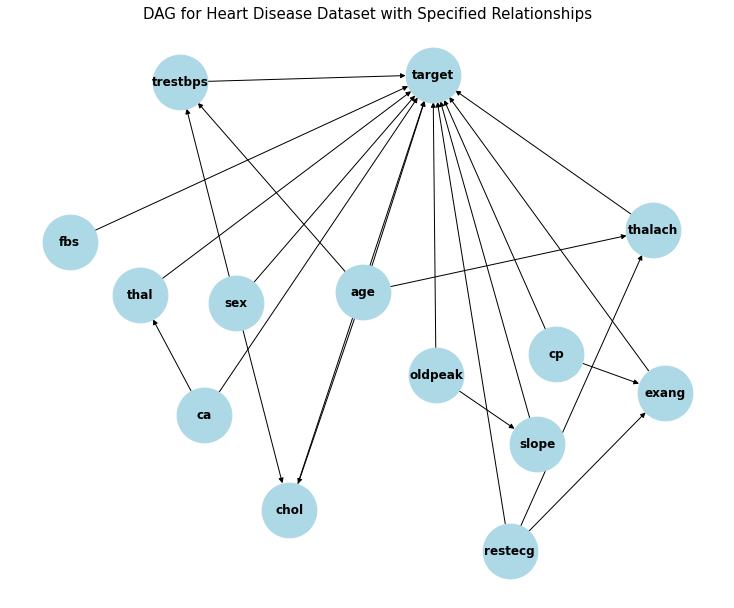

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

G_new = nx.DiGraph()

features = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

relationships = [
    ('age', 'thalach'),
    ('age', 'chol'),
    ('age', 'trestbps'),
    ('sex', 'chol'),
    ('sex', 'trestbps'),
    ('cp', 'exang'),
    ('restecg', 'thalach'),
    ('restecg', 'exang'),
    ('oldpeak', 'slope'),
    ('ca', 'thal'),
    ('age', 'target'),
    ('sex', 'target'),
    ('cp', 'target'),
    ('trestbps', 'target'),
    ('chol', 'target'),
    ('fbs', 'target'),
    ('restecg', 'target'),
    ('thalach', 'target'),
    ('exang', 'target'),
    ('oldpeak', 'target'),
    ('slope', 'target'),
    ('ca', 'target'),
    ('thal', 'target')
]

G_new.add_edges_from(relationships)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_new, seed=42)
nx.draw(G_new, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)
plt.title("DAG for Heart Disease Dataset with Specified Relationships", size=15)
plt.show()



### **Data Description**

- **age**: Age in years

- **sex**: Sex
  - 1 = male
  - 0 = female

- **cp**: Chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic

- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)

- **chol**: Serum cholesterol in mg/dl

- **fbs**: (Fasting blood sugar > 120 mg/dl)
  - 1 = true
  - 0 = false

- **restecg**: Resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- **thalach**: Maximum heart rate achieved

- **exang**: Exercise induced angina
  - 1 = yes
  - 0 = no

- **oldpeak**: ST depression induced by exercise relative to rest

- **slope**: The slope of the peak exercise ST segment
  - Value 0: upsloping
  - Value 1: flat
  - Value 2: downsloping

- **ca**: Number of major vessels (0-3) colored by fluoroscopy

- **thal**:
  - 0 = error (in the original dataset 0 maps to NaN's)
  - 1 = fixed defect
  - 2 = normal
  - 3 = reversible defect

- **target (label)**:
  - 0 = no disease
  - 1 = disease


### Confounding Factors
Potential confounding factors that may influence the analysis include age, sex, and existing health conditions. Identifying and addressing these confounders is essential to ensure the model's accuracy and reliability. The modeling process will account for these factors to mitigate their impact on the predictions.




## Data Preprocessing 


Considering that the dataset is already in a pre-processed form, the primary preprocessing task required is the careful selection of columns relevant to each model. This involves identifying the most pertinent features for accurate predictions, ensuring that the chosen columns contribute effectively to the model's performance. By focusing on the appropriate columns, we can optimize the data input for our classification models, enhancing their predictive capabilities and reliability.


In [66]:
import pandas as pd
from cmdstanpy import CmdStanModel
import numpy as np
import arviz as az
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [67]:
data = pd.read_csv('heart.csv').dropna()
data_pd = data.copy()

In [68]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [69]:
data2 = data[['age', 'trestbps', 'thalach', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,chol,oldpeak
0,63,145,150,233,2.3
1,37,130,187,250,3.5
2,41,130,172,204,1.4
3,56,120,178,236,0.8
4,57,120,163,354,0.6
...,...,...,...,...,...
298,57,140,123,241,0.2
299,45,110,132,264,1.2
300,68,144,141,193,3.4
301,57,130,115,131,1.2


In [70]:
print("Age mean:", data1.iloc[:, 0].mean())
print("Resting blood pressure mean:", data1.iloc[:, 1].mean())
print("Thalach mean:", data1.iloc[:, 2].mean())
print("Chol mean:", data2.iloc[:, 3].mean())
print("Oldpeak mean:", data2.iloc[:, 4].mean())
print("Age std:", data1.iloc[:, 0].std())
print("Resting blood pressure std:", data1.iloc[:, 1].std())
print("Thalach std:", data1.iloc[:, 2].std())
print("Chol std:", data2.iloc[:, 3].std())
print("Oldpeak std:", data2.iloc[:, 4].std())

Age mean: 54.366336633663366
Resting blood pressure mean: 131.62376237623764
Thalach mean: 149.64686468646866
Chol mean: 246.26402640264027
Oldpeak mean: 1.0396039603960396
Age std: 9.082100989837857
Resting blood pressure std: 17.5381428135171
Thalach std: 22.905161114914094
Chol std: 51.83075098793003
Oldpeak std: 1.1610750220686348


## Model 

- Two distinct models are specified. Model 1 uses three features (age, resting blood pressure, maximum heart rate achieved), while Model 2 includes additional features (cholesterol, and old peak).

- Both models uses inverse logit function (logistic regression) to compute the probability for heart disease. We use a combined linear predictor as an argument to this function. The products of this argument consists of an intercept (alpha) and coefficients (beta - each for one predictor). The parameters are created by standard normal distribuition. 

- The differences between the two models are clearly explained. Model 1 focuses on the basic health parameters (age, resting blood pressure, maximum heart rate), while Model 2 extends this by incorporating more detailed clinical measurements (cholesterol, and old peak).

- The inclusion of additional parameters in Model 2 is justified. These parameters are relevant to heart disease and could potentially enhance the model's predictive accuracy by capturing more comprehensive health information.

- Both models are sufficiently described. The parameters for each model are explicitly listed, and the corresponding data required for each model are specified.

## Priors 



When creating the priors we already started with using our predictors to discover the possible relations with the output probability. The predictors and parameters were simulated with the standard normal distribuition. The values were chosen in such a way that beta[i] * predictor[i] would return comparable values for every i, so the parameters would have similar impact on the probability.

**Prior model 1**

In [71]:
with open('prior_combined1.stan', 'r') as file:
    print(file.read())

generated quantities {
    real alpha = normal_rng(-2, 0.75);
    real beta1 = normal_rng(0.0083, 0.00332);
    real age = normal_rng(60, 20);

    real beta2 = normal_rng(0.00357, 0.001428);
    real bps = normal_rng(140, 47);

    real beta3 = normal_rng(0.00385, 0.00154);
    real thalach = normal_rng(130, 43);

    real combined_linear_predictor = alpha + beta1 * age + beta2 * bps + beta3 * thalach;
    real<lower=0, upper=1> combined_heart_disease_prob = inv_logit(combined_linear_predictor);
}



In [72]:
model1 = CmdStanModel(stan_file='prior_combined1.stan')
sim = model1.sample(iter_sampling=250,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model1 = sim.draws_pd()

20:23:32 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior_combined1.stan to exe file /root/data-analytics/prior_combined1
20:23:59 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior_combined1
20:23:59 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:23:59 - cmdstanpy - INFO - CmdStan done processing.


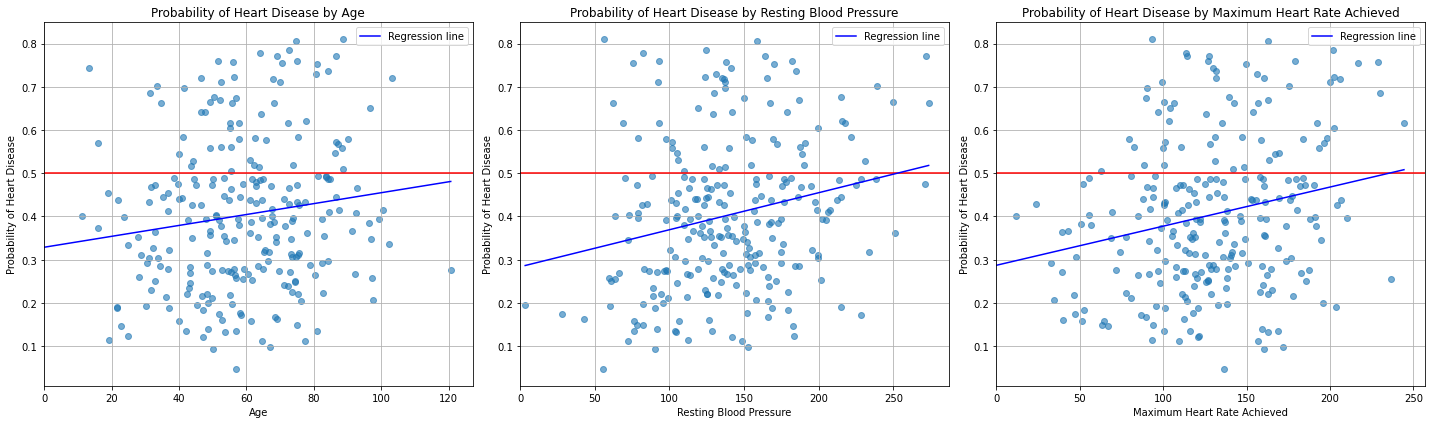

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# First subplot
x_age = prior_model1['age']
y_prob = prior_model1['combined_heart_disease_prob']
axs[0].scatter(x_age, y_prob, alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')

axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(left=0)  # Set x-axis limit to start from 0

# Second subplot
x_bps = prior_model1['bps']
axs[1].scatter(x_bps, y_prob, alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')

axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(left=0)  # Set x-axis limit to start from 0

# Third subplot
x_thalach = prior_model1['thalach']
axs[2].scatter(x_thalach, y_prob, alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')

axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)
axs[2].legend()
axs[2].set_xlim(left=0)  # Set x-axis limit to start from 0

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

The points are cummulated around the average values for a human. The regression line indicates that there are more samples above the threshold (0.5 probability) when the predictors values increase. These measurements make sense as with increased age / blood pressure or heart rate achieved, there is a bigger possibility to have a heart disease.

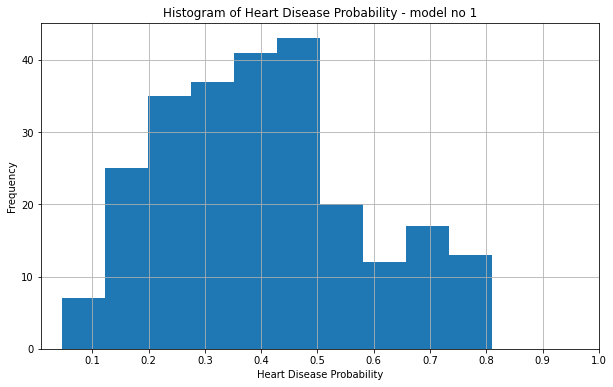

In [74]:
plt.figure(figsize=(10, 6))
plt.hist(prior_model1['combined_heart_disease_prob'], bins=10)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Prior model 2**

In [75]:
with open('prior_combined2.stan', 'r') as file:
    print(file.read())

generated quantities {
    real alpha = normal_rng(-3, 1);
    real beta1 = normal_rng(0.0083, 0.00332);
    real age = normal_rng(60, 20);

    real beta2 = normal_rng(0.00357, 0.001428);
    real bps = normal_rng(140, 47);

    real beta3 = normal_rng(0.00385, 0.00154);
    real thalach = normal_rng(130, 43);

    real beta4 = normal_rng(0.00167, 0.000668);
    real chol = normal_rng(300, 100);

    real beta5 = normal_rng(0.25, 0.1);
    real old_peak = normal_rng(2, 1);

    real combined_linear_predictor = alpha + beta1 * age + beta2 * bps + beta3 * thalach + beta4 * chol + beta5 * old_peak;
    real combined_heart_disease_prob = inv_logit(combined_linear_predictor);
}


In [76]:
model2 = CmdStanModel(stan_file='prior_combined2.stan')
sim = model2.sample(iter_sampling=250,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model2 = sim.draws_pd()

20:24:02 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior_combined2.stan to exe file /root/data-analytics/prior_combined2
20:24:21 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior_combined2
20:24:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:24:21 - cmdstanpy - INFO - CmdStan done processing.


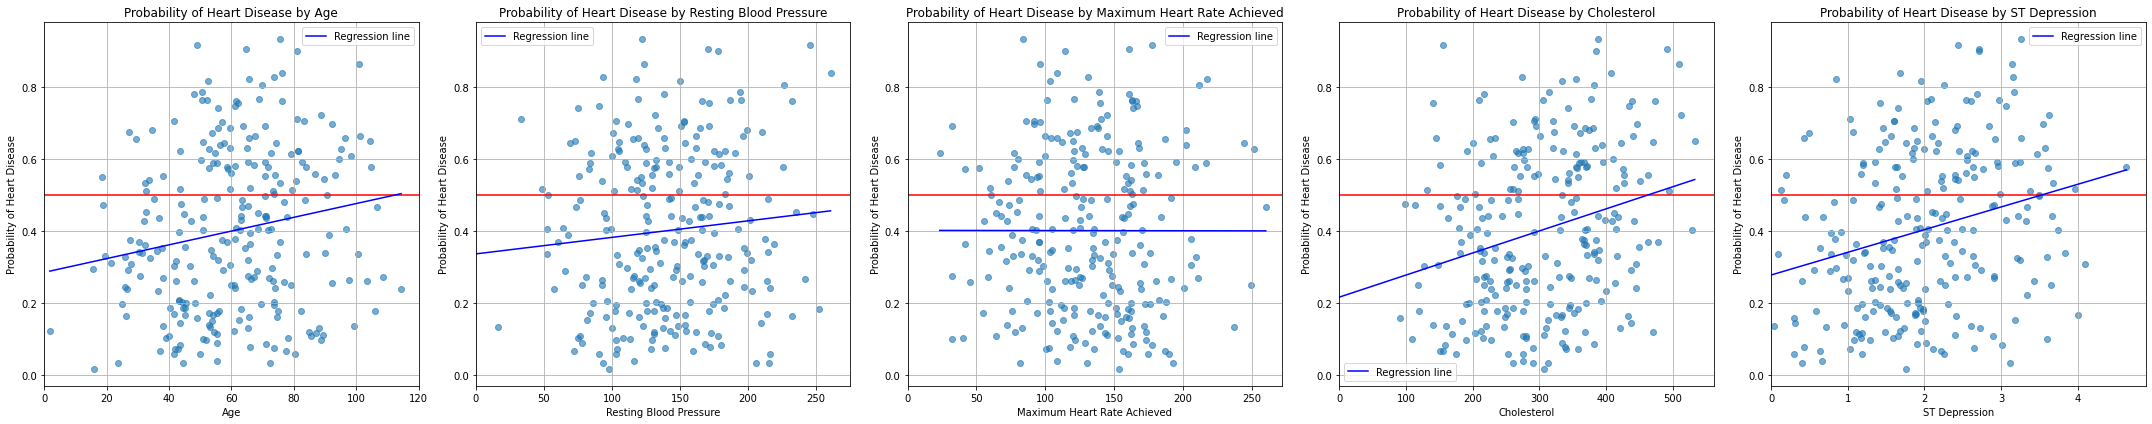

In [77]:
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

# Common y variable
y_prob = prior_model2['combined_heart_disease_prob']

# First subplot
x_age = prior_model2['age']
axs[0].scatter(x_age, y_prob, alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(left=0)  # Set x-axis limit to start from 0

# Second subplot
x_bps = prior_model2['bps']
axs[1].scatter(x_bps, y_prob, alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(left=0)  # Set x-axis limit to start from 0

# Third subplot
x_thalach = prior_model2['thalach']
axs[2].scatter(x_thalach, y_prob, alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)
axs[2].legend()
axs[2].set_xlim(left=0)  # Set x-axis limit to start from 0

# Fourth subplot
x_chol = prior_model2['chol']
axs[3].scatter(x_chol, y_prob, alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_chol, y_prob, 1)
x_range = np.linspace(x_chol.min(), x_chol.max(), 100)
axs[3].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')
axs[3].set_xlabel('Cholesterol')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol')
axs[3].grid(True)
axs[3].legend()
axs[3].set_xlim(left=0)  # Set x-axis limit to start from 0

# Fifth subplot
x_old_peak = prior_model2['old_peak']
axs[4].scatter(x_old_peak, y_prob, alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_old_peak, y_prob, 1)
x_range = np.linspace(x_old_peak.min(), x_old_peak.max(), 100)
axs[4].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression line')
axs[4].set_xlabel('ST Depression')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST Depression')
axs[4].grid(True)
axs[4].legend()
axs[4].set_xlim(left=0)  # Set x-axis limit to start from 0

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

The increased number of predictors changed the regression line for the first 3 predictors. The slope decreased a little bit, and for the 3rd predictor it is even negative. The number of samples above the 0.5 probability increased. 

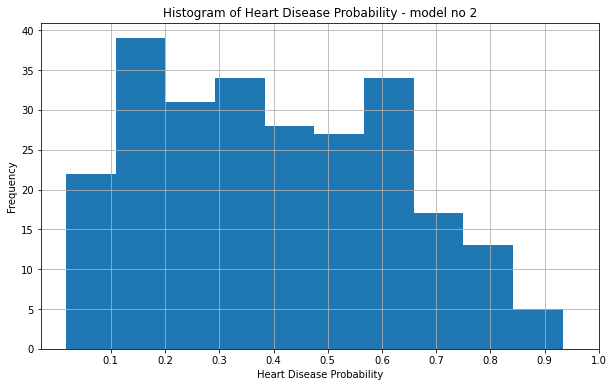

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(prior_model2['combined_heart_disease_prob'], bins=10)
plt.title('Histogram of Heart Disease Probability - model no 2')
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Posterior Analysis (Model 1) 



The presumptions for posterior model were similar to priors, but the predictors used real data.

In [79]:
data = pd.read_csv('heart.csv').dropna()
data1 = data[['age', 'trestbps', 'thalach', 'target']]
data1

,age,trestbps,thalach,target
0,63,145,150,1
1,37,130,187,1
2,41,130,172,1
3,56,120,178,1
4,57,120,163,1
...,...,...,...,...
298,57,140,123,0
299,45,110,132,0
300,68,144,141,0
301,57,130,115,0


In [80]:
with open('posterior1.stan', 'r') as file:
    print(file.read())

data {
    int<lower=1> N; 
    array[N] int<lower=0> age;
    array[N] int<lower=0> bps;
    array[N] int<lower=0> thalach;
    array[N] int<lower=0, upper=1> y;
}

parameters {
    real alpha;
    real beta1;
    real beta2;
    real beta3;
}

transformed parameters {
    array[N] real combined_linear_predictor;
    for (n in 1:N) {
        combined_linear_predictor[n] = alpha + beta1 * age[n] + beta2 * bps[n] + beta3 * thalach[n];
    }
}

model {
    alpha ~ normal(-1.75, 0.75);
    beta1 ~ normal(0.0083, 0.00332);
    beta2 ~ normal(0.00357, 0.001428);
    beta3 ~ normal(0.00385, 0.00154);

    y ~ bernoulli_logit(combined_linear_predictor);
}

generated quantities {
    array[N] real<lower=0, upper=1> combined_heart_disease_prob;
    array[N] real log_lik;

    for (n in 1:N) {
        combined_heart_disease_prob[n] = inv_logit(combined_linear_predictor[n]);
        log_lik[n] = bernoulli_logit_lpmf(y[n] | combined_linear_predictor[n]);
    }
}


In [81]:
posterior1_model = CmdStanModel(stan_file='posterior1.stan')
data_model1 = {'N': len(data1), 'age': data1.iloc[:, 0], 'bps': data1.iloc[:, 1], 'thalach': data1.iloc[:, 2], 'y': data1.iloc[:, 3]}
sim = posterior1_model.sample(data=data_model1,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior1 = sim.draws_pd()

20:24:22 - cmdstanpy - INFO - compiling stan file /root/data-analytics/posterior1.stan to exe file /root/data-analytics/posterior1
20:24:46 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/posterior1
20:24:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:24:49 - cmdstanpy - INFO - CmdStan done processing.


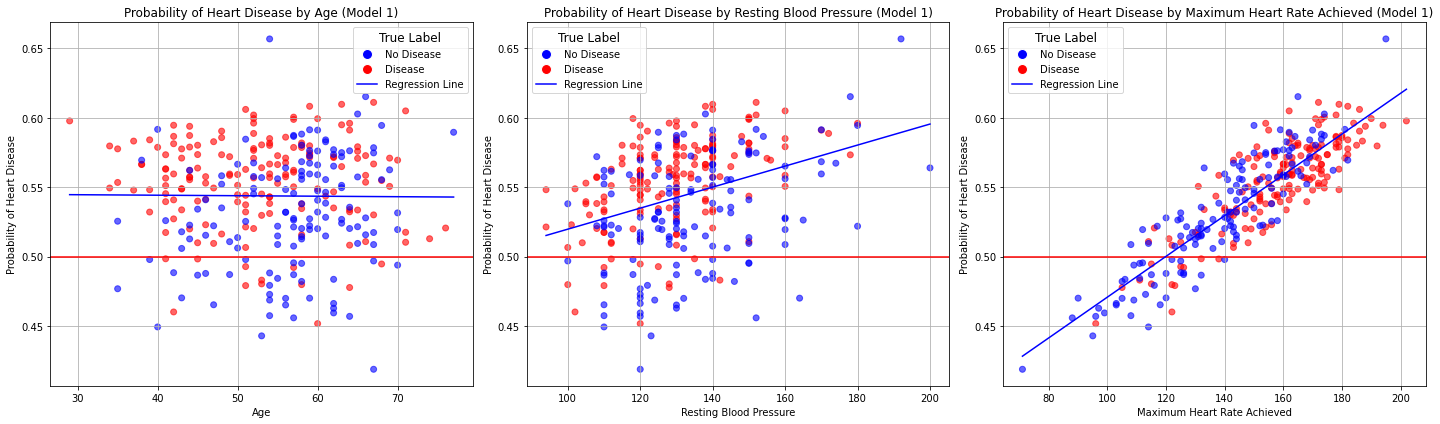

In [82]:
true_labels = data['target'].values
predictions1 = sim.stan_variable('combined_heart_disease_prob').mean(axis=0)
data_model1['y'] = predictions1

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Age vs Probability of Heart Disease
x_age = data_model1['age']
y_prob = data_model1['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 1)')
axs[0].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[0].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model1['bps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 1)')
axs[1].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[1].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model1['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 1)')
axs[2].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[2].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()

The prior for parameters seems to work uncorrectly, because only tight range of values in [0, 1] scope was reached. In order to avoid that, we tried to increase the standard deviation of parameters multiplied by predictors in the next attempt. 

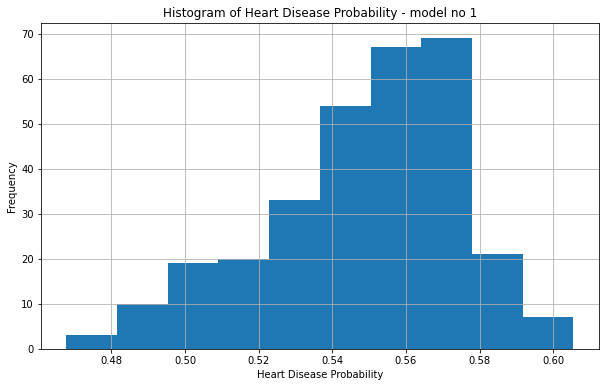

In [83]:
histogram_data = []
for i in range(len(data1)):
    histogram_data.append(posterior1[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Posterior 1 - 2nd attempt**


In [84]:
with open('posterior1_2nd_try.stan', 'r') as file:
    print(file.read())

data {
    int<lower=1> N;
    array[N] int<lower=0> age;
    array[N] int<lower=0> bps;
    array[N] int<lower=0> thalach;
    array[N] int<lower=0, upper=1> y;
}

parameters {
    real alpha;
    real beta1;
    real beta2;
    real beta3;
}

transformed parameters {
    array[N] real combined_linear_predictor;
    for (n in 1:N) {
        combined_linear_predictor[n] = alpha + beta1 * age[n] + beta2 * bps[n] + beta3 * thalach[n];
    }
}

model {
    alpha ~ normal(-1.75, 0.75);
    beta1 ~ normal(0.0083, 0.0332);
    beta2 ~ normal(0.0038, 0.01428);
    beta3 ~ normal(0.0033, 0.0154);

    y ~ bernoulli_logit(combined_linear_predictor);
}

generated quantities {
    array[N] real<lower=0, upper=1> combined_heart_disease_prob;
    array[N] real log_lik;

    for (n in 1:N) {
        combined_heart_disease_prob[n] = inv_logit(combined_linear_predictor[n]);
        log_lik[n] = bernoulli_logit_lpmf(y[n] | combined_linear_predictor[n]);
    }
}


In [85]:
posterior1_model = CmdStanModel(stan_file='posterior1_2nd_try.stan')
data_model1 = {'N': len(data1), 'age': data1.iloc[:, 0], 'bps': data1.iloc[:, 1], 'thalach': data1.iloc[:, 2], 'y': data1.iloc[:, 3]}
sim1 = posterior1_model.sample(data=data_model1,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior1 = sim1.draws_pd()

20:24:50 - cmdstanpy - INFO - compiling stan file /root/data-analytics/posterior1_2nd_try.stan to exe file /root/data-analytics/posterior1_2nd_try
20:25:15 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/posterior1_2nd_try
20:25:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:25:19 - cmdstanpy - INFO - CmdStan done processing.


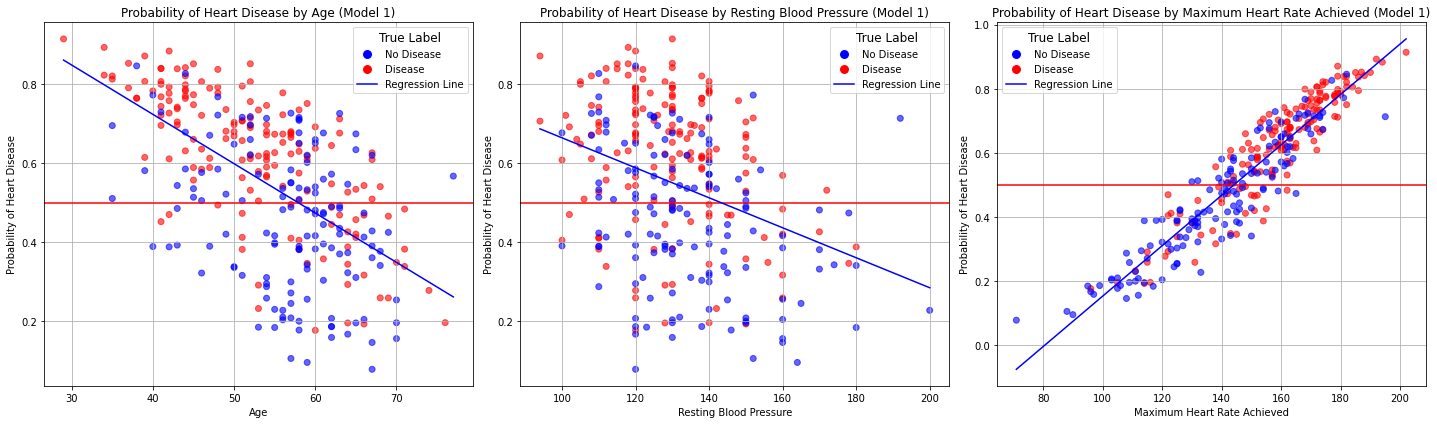

In [86]:
true_labels = data['target'].values
predictions1 = sim1.stan_variable('combined_heart_disease_prob').mean(axis=0)
data_model1['y'] = predictions1

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Age vs Probability of Heart Disease
x_age = data_model1['age']
y_prob = data_model1['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 1)')
axs[0].grid(True)

# Calculate and plot regression line
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[0].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model1['bps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 1)')
axs[1].grid(True)

# Calculate and plot regression line
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[1].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model1['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 1)')
axs[2].grid(True)

# Calculate and plot regression line
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[2].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()

The samples reached the full range now. This model shows an unexpected behaviour - the probability of heart disease decreases with the age or blood pressure but is proportional to maximum heart rate achieved being the most important factor in predicting the disease.

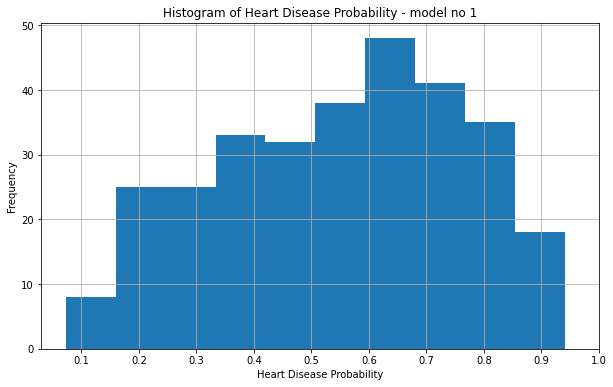

In [87]:
histogram_data = []
for i in range(len(data1)):
    histogram_data.append(posterior1[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Posterior Analysis (Model 2)


The second model is extended with two new predictors. There are 2 variants - linear and quadratic. In the quadratic model, the value of predictor has a power of 2 and then is multiplied by the coefficient. 

In [88]:
data = pd.read_csv('heart.csv').dropna()
data_model2 = data[['age', 'trestbps', 'thalach', 'chol', 'oldpeak']]
data_model2_dict = {
    'N': len(data_model2),
    'age': data_model2['age'].values,
    'trestbps': data_model2['trestbps'].values,
    'thalach': data_model2['thalach'].values,
    'chol': data_model2['chol'].values,
    'oldpeak': data_model2['oldpeak'].values,
    'y': data['target'].values
}

In [89]:
with open('posterior2.stan', 'r') as file:
    print(file.read())

data {
    int<lower=1> N;       
    array[N] int<lower=0> age;
    array[N] int<lower=0> trestbps;
    array[N] int<lower=0> thalach;
    array[N] int<lower=0> chol;
    array[N] real<lower=0> oldpeak;      
    array[N] int<lower=0, upper=1> y; 
}

parameters {
    real alpha;             
    real beta1;             
    real beta2;             
    real beta3;            
    real beta4;            
    real beta5;             
}

transformed parameters {
    array[N] real combined_linear_predictor;
    for (n in 1:N) {
        combined_linear_predictor[n] = alpha + beta1 * age[n] + beta2 * trestbps[n] + beta3 * thalach[n] + beta4 * chol[n] + beta5 * oldpeak[n];
    }
}

model {
    alpha ~ normal(-4, 1);
    beta1 ~ normal(0.0083, 0.0332);
    beta2 ~ normal(0.00385, 0.0154);
    beta3 ~ normal(0.00357, 0.01428);
    beta4 ~ normal(0.00167, 0.0668);
    beta5 ~ normal(0.25, 0.1);

    y ~ bernoulli_logit(combined_linear_predictor);
}

generated quantities {
    array[N] real<lowe

In [90]:
posterior2_model = CmdStanModel(stan_file='posterior2.stan')
sim2 = posterior2_model.sample(data=data_model2_dict,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior2 = sim2.draws_pd()

20:25:23 - cmdstanpy - INFO - compiling stan file /root/data-analytics/posterior2.stan to exe file /root/data-analytics/posterior2
20:25:47 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/posterior2
20:25:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:25:55 - cmdstanpy - INFO - CmdStan done processing.


**Posterior 2 - quadratic**

In [91]:
data = pd.read_csv('heart.csv').dropna()
data_model2 = data[['age', 'trestbps', 'thalach', 'chol', 'oldpeak']]
data_model2_dict = {
    'N': len(data_model2),
    'age': data_model2['age'].values,
    'trestbps': data_model2['trestbps'].values,
    'thalach': data_model2['thalach'].values,
    'chol': data_model2['chol'].values,
    'oldpeak': data_model2['oldpeak'].values,
    'y': data['target'].values
}

In [92]:
with open('posterior2_quadratic.stan', 'r') as file:
    print(file.read())

data {
    int<lower=1> N;      
    array[N] int<lower=0> age;
    array[N] int<lower=0> trestbps;
    array[N] int<lower=0> thalach;
    array[N] int<lower=0> chol;
    array[N] real<lower=0> oldpeak;      
    array[N] int<lower=0, upper=1> y;
}

parameters {
    real alpha;            
    real beta1;             
    real beta2;              
    real beta3;             
    real beta4;             
    real beta5;             
}

transformed parameters {
    array[N] real combined_linear_predictor;
    for (n in 1:N) {
        combined_linear_predictor[n] = alpha + beta1 * age[n]^2 + beta2 * trestbps[n]^2 + beta3 * thalach[n]^2 + beta4 * chol[n]^2 + beta5 * oldpeak[n]^2;
    }
}

model {
    // Priors
    alpha ~ normal(-4, 1);
    beta1 ~ normal(0.0083, 0.0332);
    beta2 ~ normal(0.00385, 0.0154);
    beta3 ~ normal(0.00357, 0.01428);
    beta4 ~ normal(0.00167, 0.0668);
    beta5 ~ normal(0.25, 0.1);

    y ~ bernoulli_logit(combined_linear_predictor);
}

generated quantities 

In [93]:
posterior2_model_q = CmdStanModel(stan_file='posterior2_quadratic.stan')
sim2_q = posterior2_model_q.sample(data=data_model2_dict,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior2_q = sim2_q.draws_pd()

20:25:56 - cmdstanpy - INFO - compiling stan file /root/data-analytics/posterior2_quadratic.stan to exe file /root/data-analytics/posterior2_quadratic
20:26:22 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/posterior2_quadratic
20:26:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:27:22 - cmdstanpy - INFO - CmdStan done processing.
20:27:22 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 484 iterations at max treedepth (48.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


/tmp/ipykernel_12849/3123712464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model2['y'] = predictions2


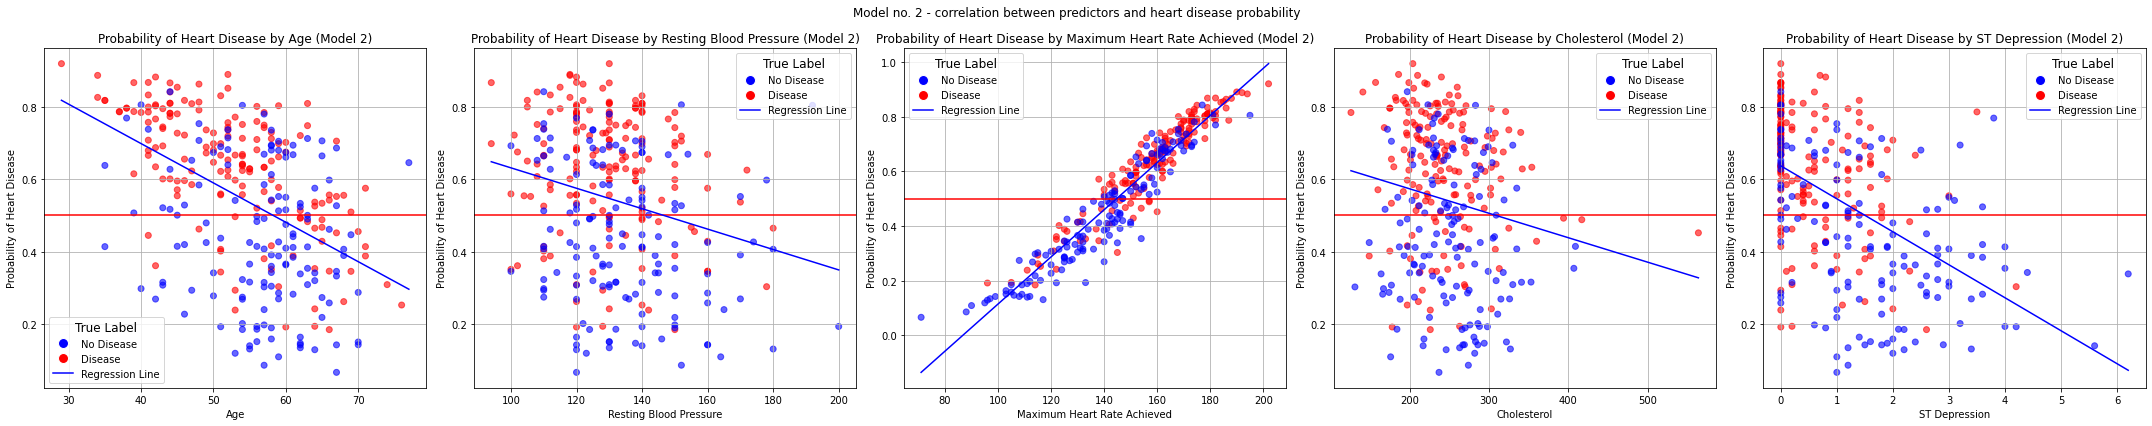

/tmp/ipykernel_12849/3123712464.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model2['y'] = predictions2_q


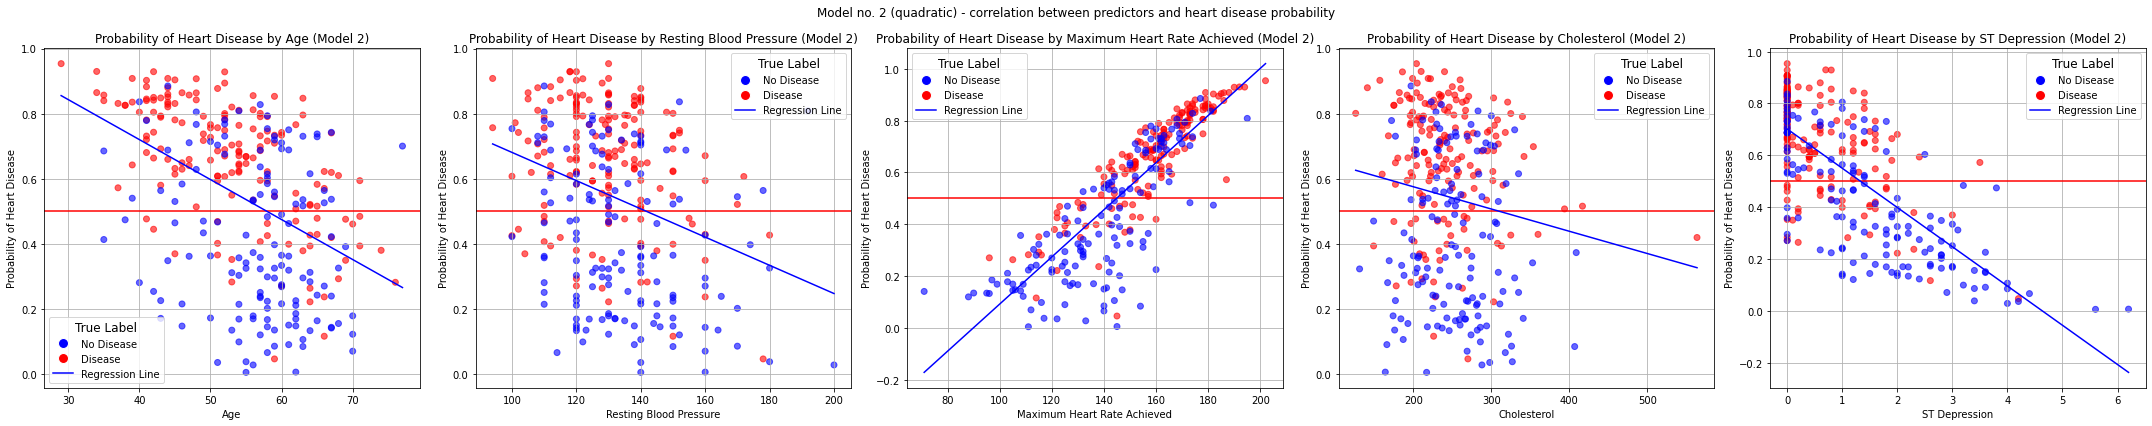

In [94]:
true_labels = data['target'].values

predictions2 = sim2.stan_variable('combined_heart_disease_prob').mean(axis=0)
data_model2['y'] = predictions2

fig, axs = plt.subplots(1, 5, figsize=(30, 6))
fig.suptitle('Model no. 2 - correlation between predictors and heart disease probability')

# Age vs Probability of Heart Disease
x_age = data_model2['age']
y_prob = data_model2['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 2)')
axs[0].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[0].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model2['trestbps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 2)')
axs[1].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[1].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model2['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 2)')
axs[2].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[2].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Cholesterol vs Probability of Heart Disease
x_chol = data_model2['chol']
scatter = axs[3].scatter(x_chol, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
axs[3].set_xlabel('Cholesterol')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol (Model 2)')
axs[3].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_chol, y_prob, 1)
x_range = np.linspace(x_chol.min(), x_chol.max(), 100)
axs[3].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[3].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# ST Depression vs Probability of Heart Disease
x_oldpeak = data_model2['oldpeak']
scatter = axs[4].scatter(x_oldpeak, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
axs[4].set_xlabel('ST Depression')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST Depression (Model 2)')
axs[4].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_oldpeak, y_prob, 1)
x_range = np.linspace(x_oldpeak.min(), x_oldpeak.max(), 100)
axs[4].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[4].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()

true_labels = data['target'].values

predictions2_q = sim2_q.stan_variable('combined_heart_disease_prob').mean(axis=0)
data_model2['y'] = predictions2_q

fig, axs = plt.subplots(1, 5, figsize=(30, 6))
fig.suptitle('Model no. 2 (quadratic) - correlation between predictors and heart disease probability')

# Age vs Probability of Heart Disease
x_age = data_model2['age']
y_prob = data_model2['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 2)')
axs[0].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[0].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model2['trestbps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 2)')
axs[1].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[1].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model2['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 2)')
axs[2].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[2].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# Cholesterol vs Probability of Heart Disease
x_chol = data_model2['chol']
scatter = axs[3].scatter(x_chol, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
axs[3].set_xlabel('Cholesterol')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol (Model 2)')
axs[3].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_chol, y_prob, 1)
x_range = np.linspace(x_chol.min(), x_chol.max(), 100)
axs[3].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[3].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

# ST Depression vs Probability of Heart Disease
x_oldpeak = data_model2['oldpeak']
scatter = axs[4].scatter(x_oldpeak, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
axs[4].set_xlabel('ST Depression')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST Depression (Model 2)')
axs[4].grid(True)
# Calculate and plot regression line
coeffs = np.polyfit(x_oldpeak, y_prob, 1)
x_range = np.linspace(x_oldpeak.min(), x_oldpeak.max(), 100)
axs[4].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-', label='Regression Line')
axs[4].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label='Regression Line')
], title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()


The quadratic model is more "sure" about his predictions, as the values reach area near boundaries (0, 1) more often. However the relationship between predictors and probability is similar at all. There is only one predictor that causes the probability to rise, where the rest of them decreases (ST depression was expected to do so).  

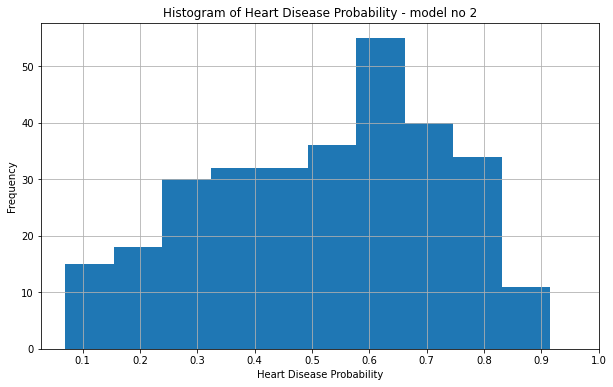

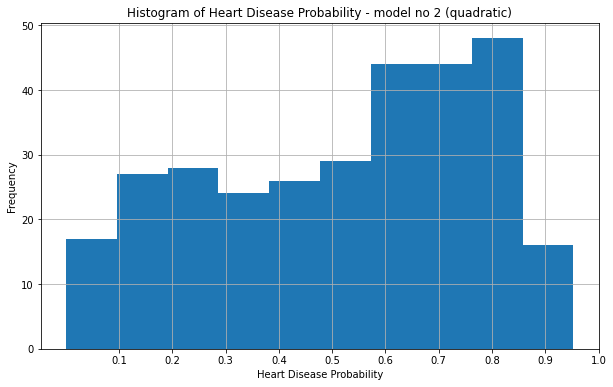

In [95]:
histogram_data = []
for i in range(len(data2)):
    histogram_data.append(posterior2[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Histogram of Heart Disease Probability - model no 2')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

histogram_data = []
for i in range(len(data2)):
    histogram_data.append(posterior2_q[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Histogram of Heart Disease Probability - model no 2 (quadratic)')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Model Comparison



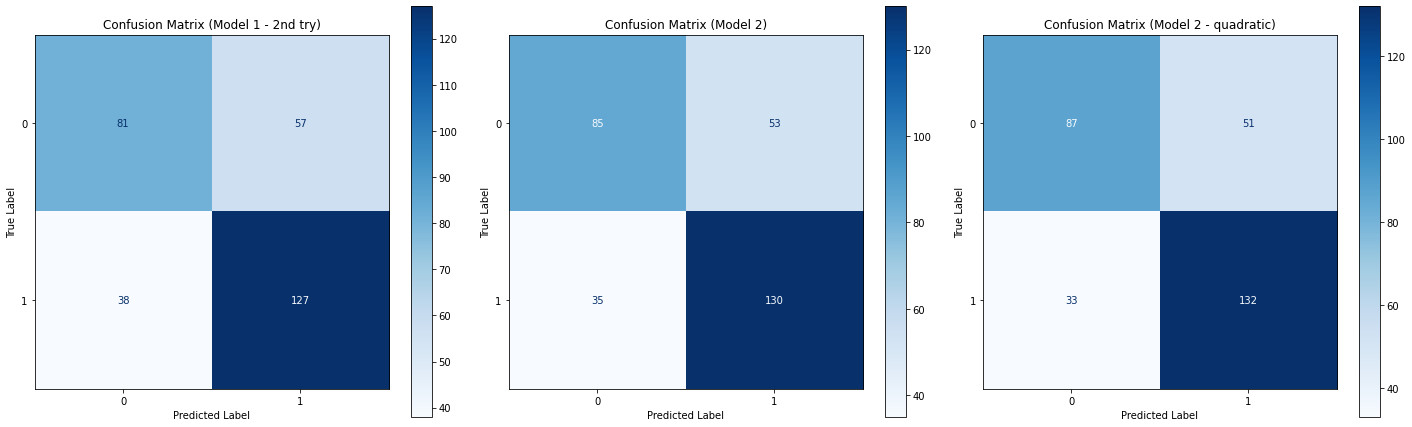

In [96]:
predictions1 = sim1.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2 = sim2.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2_q = sim2_q.stan_variable('combined_heart_disease_prob').mean(axis=0)

threshold = 0.5
pred_labels1 = (predictions1 > threshold).astype(int)
pred_labels2 = (predictions2 > threshold).astype(int)
pred_labels2_q = (predictions2_q > threshold).astype(int)

cm1 = confusion_matrix(data['target'], pred_labels1)
cm2 = confusion_matrix(data['target'], pred_labels2)
cm2_q = confusion_matrix(data['target'], pred_labels2_q)

# Plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Confusion matrix for Model 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1])
disp1.plot(ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix (Model 1 - 2nd try)')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# Confusion matrix for Model 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
disp2.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Model 2)')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2_q, display_labels=[0, 1])
disp2.plot(ax=axs[2], cmap='Blues')
axs[2].set_title('Confusion Matrix (Model 2 - quadratic)')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [97]:
predictions = sim.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions1 = sim1.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2 = sim2.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2_q = sim2_q.stan_variable('combined_heart_disease_prob').mean(axis=0)

threshold = 0.5
pred_labels = (predictions > threshold).astype(int)
pred_labels1 = (predictions1 > threshold).astype(int)
pred_labels2 = (predictions2 > threshold).astype(int)
pred_labels2_q = (predictions2_q > threshold).astype(int)

accuracy = accuracy_score(data['target'], pred_labels)
accuracy1 = accuracy_score(data['target'], pred_labels1)
accuracy2 = accuracy_score(data['target'], pred_labels2)
accuracy2_q = accuracy_score(data['target'], pred_labels2_q)

print(f"Accuracy for Model 1: {accuracy:.4f}")
print(f"Accuracy for Model 1 (2nd try): {accuracy1:.4f}")
print(f"Accuracy for Model 2: {accuracy2:.4f}")
print(f"Accuracy for Model 2 (quadratic): {accuracy2_q:.4f}")

Accuracy for Model 1: 0.6139
Accuracy for Model 1 (2nd try): 0.6865
Accuracy for Model 2: 0.7096
Accuracy for Model 2 (quadratic): 0.7228


In [98]:
print(classification_report(data['target'], pred_labels1))
print(classification_report(data['target'], pred_labels2_q))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       138
           1       0.69      0.77      0.73       165

    accuracy                           0.69       303
   macro avg       0.69      0.68      0.68       303
weighted avg       0.69      0.69      0.68       303

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       138
           1       0.72      0.80      0.76       165

    accuracy                           0.72       303
   macro avg       0.72      0.72      0.72       303
weighted avg       0.72      0.72      0.72       303



In binary classification, recall of the positive class is also known as “sensitivity” (probability of a positive test given that the patient has the disease); recall of the negative class is “specificity” (probability of a negative test given that the patient is well). The chance of detecting a heart disease for people that indeed have a heart disease is equal to 77% for 3 predictors models and equal to 80% for 5 predictors model.

The accuracy is the best indicator for success of the model. The overall precision for the quadratic model is more than 72%.

In [99]:
info = az.from_cmdstanpy(posterior=sim, log_likelihood='log_lik')
info1 = az.from_cmdstanpy(posterior=sim1, log_likelihood='log_lik')
info2 = az.from_cmdstanpy(posterior=sim2, log_likelihood='log_lik')
info2_q = az.from_cmdstanpy(posterior=sim2_q, log_likelihood='log_lik')
compare_dict = {'model1': info, 'model1 - 2nd try': info1, 'model2': info2, 'model2 - quadratic': info2_q}

In [100]:
waic_compare = az.compare(compare_dict, ic='waic')
waic_compare.head()

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model2 - quadratic,0,-167.855992,5.178563,0.000000,9.789605e-01,8.103072,0.000000,True,log
model2,1,-175.455673,4.083666,7.599682,1.912224e-15,6.628463,3.449390,False,log
model1 - 2nd try,2,-180.413250,2.770534,12.557259,2.526893e-15,6.330400,4.410677,False,log
model1,3,-203.584828,1.177532,35.728836,2.103947e-02,1.959347,7.406591,False,log


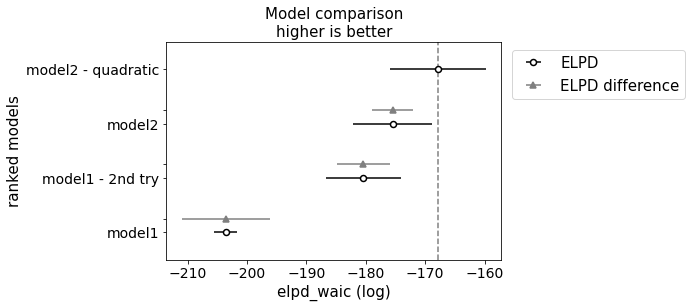

In [101]:
az.plot_compare(waic_compare)
plt.show()

In [102]:
loo_compare = az.compare(compare_dict, ic='loo')
loo_compare.head()

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model2 - quadratic,0,-167.892332,5.214903,0.000000,0.978815,8.104979,0.000000,False,log
model2,1,-175.480413,4.108406,7.588080,0.000000,6.629636,3.449560,False,log
model1 - 2nd try,2,-180.428664,2.785948,12.536332,0.000000,6.331246,4.412797,False,log
model1,3,-203.591561,1.184265,35.699229,0.021185,1.959457,7.408680,False,log


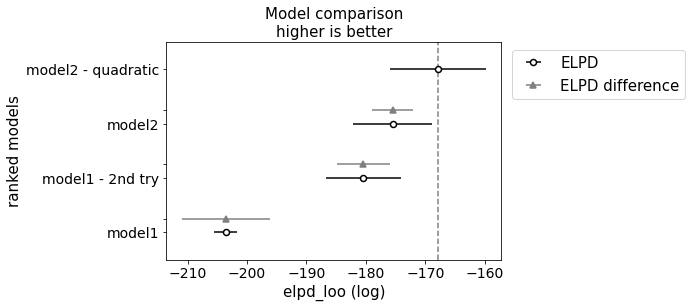

In [103]:
az.plot_compare(loo_compare)
plt.show()

The results given by both methos are similar. The winner in both cases is quadratic model no. 2 with five predictors, however the difference is not major. No warning has occurred.

In overall, the best model is a quadratic model using 5 predictors. The results for WAIC, LOO and classification reports showed that in every case.